In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import vclamp_evaluator_HMMtoHH as vcl_ev
import HMM_plotter as plotter
import generalized_genSim_shorten_time_HMM as ggsdHMM
import generalized_genSim_shorten_time as ggsd
#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_narrow.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl.tmp'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': [], 'time_to_peak': []}


In [2]:
best_overall = [697.0294539156849, 0.004111457267787427, 8.606280166865144, 0.17632589697239287, 4.476629327467351, 0.017190950704792082, 2.467663582267157, 0.2500376984977771, 4.763004063650632, 0.13947858479669814, 1.3974306661206208, 0.04874670560815507, 2.6836926561824184, 0.28960734143069267, 0.11411272747594757, 2.3841524832408063, 55.93067185579274, 0.10796963909131693, -26.08541569297585, -19.165299175595184, 9140.633932435027, 3.931254507003979, 0.31766064793963605] 

In [3]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [4]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [5]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [6]:
print(log)


gen	nevals	avg    	std   	min    	max        
1  	500   	538170 	966691	2014   	7.52911e+06
2  	500   	511492 	940761	2014   	7.52911e+06
3  	500   	131586 	509701	2014   	4.13851e+06
4  	500   	115180 	464889	2014   	2.11094e+06
5  	500   	110705 	456791	2015.76	2.05688e+06
6  	500   	225042 	635205	2015.76	2.11071e+06
7  	500   	177980 	571605	2011.9 	2.11077e+06
8  	500   	169685 	559399	2011.9 	2.11071e+06
9  	500   	73784.6	374539	2007.49	2.04235e+06
10 	500   	141026 	513285	2007.49	2.1108e+06 
11 	500   	88047.7	409289	2007.49	2.1107e+06 
12 	500   	43055.6	285325	2007.49	2.04181e+06
13 	500   	61468.1	342765	2007.49	2.11072e+06
14 	500   	35254.6	256631	2007.49	2.11073e+06
15 	500   	53198.8	318161	2004.65	2.04084e+06
16 	500   	49109.2	305570	2004.65	2.0522e+06 
17 	500   	59323.9	336235	2004.65	2.04203e+06
18 	500   	61293.5	341989	2004.65	2.04238e+06
19 	500   	43022.4	285341	2004.65	2.04457e+06
20 	500   	67464.7	358694	2007.49	2.04119e+06
21 	500   	28734  	230867	2007.49	

In [7]:
import eval_helper_na12mut as ehn
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [8]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'
import eval_helper_na12mut as ehn

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = ehn.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} p:{fact}')
    return p_names,p_fact
    
    

In [9]:
best_hof = hof[0]
#p = best_hof
p = best_overall
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [890.1124081743524, 1.9505860924610245, 0.47997872980193224, 0.303821576209447, 165.9972568935996, 0.058937777464424364, 7.799907816178345, 0.23560275985760837, 13.735617369838618, 0.2090441526830076, 0.39437739413292544, 0.15082093567893565, 1.6194004922259806, 0.34697629867035396, 0.06941193249754085, 9.503521734453258, 206.31251154565604, 0.12936409137334354, -29.825640435696016, 6.254143327677866, 17591.85363384948, 1.852400913805246, 9.921421533462572]
[inact_err, act_err]: (0.24188842201330493, 3.555026324138111, 0.015435585391592982, 0.19541043320734958, 1000, 1000, 0.6447673160486865)


In [10]:
pnames,pfactors = get_place_in_range(p,csv_file)

a1_0 - lb:9.17 ub:1000.0 p:0.6942255017668874
a1_1 - lb:0.0 ub:10.0 p:0.0004111457267787427
b1_0 - lb:0.0 ub:10.0 p:0.8606280166865143
b1_1 - lb:0.0177 ub:0.4424 p:0.37350105244264864
a2_0 - lb:0.0 ub:400.0 p:0.011191573318668378
a2_1 - lb:0.0 ub:0.1109 p:0.1550130811974038
b2_0 - lb:0.113 ub:10.0 p:0.23815753841075726
b2_1 - lb:0.0122 ub:0.3054 p:0.8111790535394854
a3_0 - lb:0.0 ub:359.0595 p:0.013265222236567007
a3_1 - lb:0.0132 ub:0.3297 p:0.3989844701317477
b3_0 - lb:0.1506 ub:10.0 p:0.12658950455059403
b3_1 - lb:0.0 ub:0.1824 p:0.2672516754833063
bh_0 - lb:0.0 ub:14.1507 p:0.1896508763652977
bh_1 - lb:0.0578 ub:1.445 p:0.16710448488371732
bh_2 - lb:0.0139 ub:0.348 p:0.2999483013347728
ah_0 - lb:0.1152 ub:10.0 p:0.22953954386945674
ah_1 - lb:0.0 ub:815.0 p:0.06862659123410152
ah_2 - lb:0.0054 ub:1.0 p:0.10312652231180065
vShift - lb:-50.0 ub:50.0 p:0.2391458430702415
vShift_inact - lb:-50.0 ub:30.0 p:0.3854337603050602
maxrate - lb:1600.0 ub:40000.0 p:0.19637067532382882
ahfactor -

[Text(0, 0, 'a1_0'),
 Text(0, 1, 'a1_1'),
 Text(0, 2, 'b1_0'),
 Text(0, 3, 'b1_1'),
 Text(0, 4, 'a2_0'),
 Text(0, 5, 'a2_1'),
 Text(0, 6, 'b2_0'),
 Text(0, 7, 'b2_1'),
 Text(0, 8, 'a3_0'),
 Text(0, 9, 'a3_1'),
 Text(0, 10, 'b3_0'),
 Text(0, 11, 'b3_1'),
 Text(0, 12, 'bh_0'),
 Text(0, 13, 'bh_1'),
 Text(0, 14, 'bh_2'),
 Text(0, 15, 'ah_0'),
 Text(0, 16, 'ah_1'),
 Text(0, 17, 'ah_2'),
 Text(0, 18, 'vShift'),
 Text(0, 19, 'vShift_inact'),
 Text(0, 20, 'maxrate'),
 Text(0, 21, 'ahfactor'),
 Text(0, 22, 'bhfactor')]

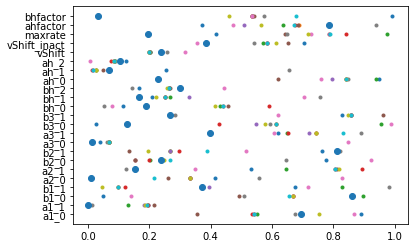

In [11]:


fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
all_pfactors = np.zeros(len(pnames))
for p in hof[0:10]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    all_pfactors = all_pfactors + pfactors
    ax.plot(pfactors,yaxis,'.')
#p=hof[0]
p = best_overall
pnames,pfactors = get_place_in_range(p,csv_file,True)
ax.plot(pfactors,yaxis,'o','black')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


In [12]:
p = best_overall

1
2
3
4


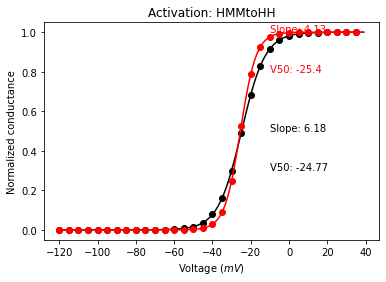

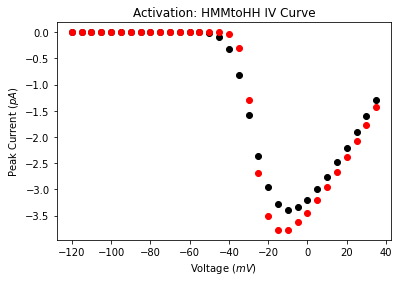

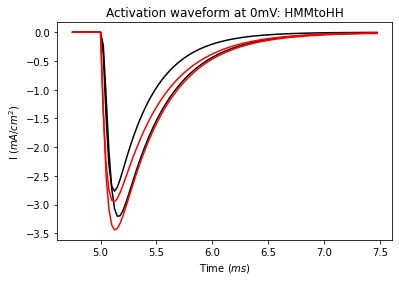

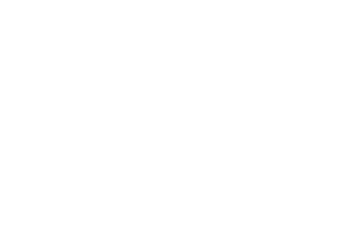

In [13]:
plotter.make_act_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

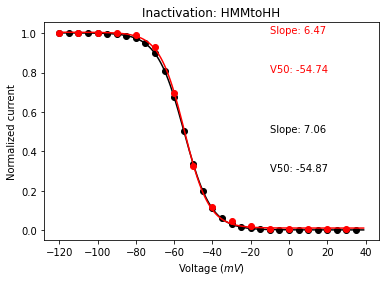

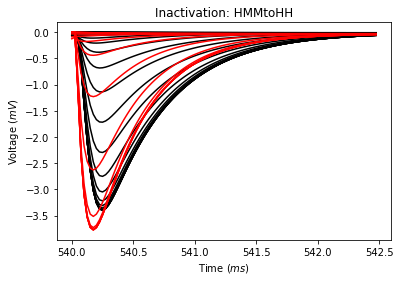

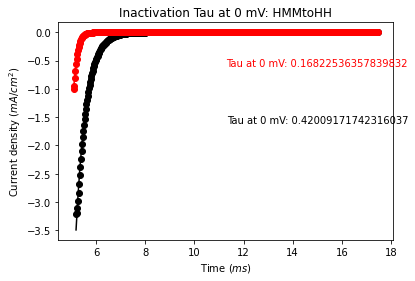

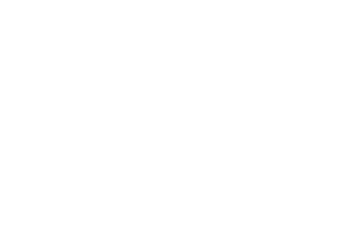

In [14]:
plotter.make_inact_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

In [15]:
import eval_helper_na12mut8st as ehn8
import eval_helper_na12mut as ehn
import curve_fitting as cf
act_obj = ggsdHMM.Activation(channel_name='na16')

# Test HH Target data

In [16]:
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)

In [17]:
is_HMM = False 
wild_data = {}
# Create genSim objects
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)
act_obj = ggsd.Activation(channel_name='na16')
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
peak_amp = ehn.find_peak_amp(act_obj,[14,33])
time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
inact_obj = ggsd.Inactivation(channel_name='na16')
#recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HH)

ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
#y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
# gv_slope, v_half_act, top, bottom = (1, 1, 1, 1)
# ssi_slope, v_half_inact, top, bottom = (1, 1, 1, 1)
# y0, plateau, percent_fast, k_fast, k_slow = (1, 1, 1, 1, 1)

# Ramp Protocol
# ramp = ggsdHMM.Ramp(channel_name=self.channel_name)
# ramp_area = ramp.areaUnderCurve
# persistent_curr = ramp.persistentCurrent()

wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
#wild_data['tau_fast'] = 1 / k_fast
#wild_data['tau_slow'] = 1 / k_slow
#wild_data['percent_fast'] = percent_fast
# wild_data['udb20'] = 0
wild_data['tau0'] = tau0
# wild_data['ramp'] = ramp_area
# wild_data['persistent'] = persistent_curr

# Some extra objectives added last minute, so this is a bit hard-coded
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



{'v_half_act': -24.766773947903665, 'gv_slope': 6.182889399959395, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171742316037, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


# Test HMM

In [18]:
import curve_fitting as cf
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)

In [19]:
print(gv_slope, v_half_act, top, bottom )

6.182889399959395 -24.766773947903665 1.0000000000116729 1.844638323009083e-10


In [20]:
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
           

In [21]:
print(ssi_slope, v_half_inact, top, bottom)

7.05877216715777 -54.872868637744034 0.002864608183022642 1.0008524331966844


In [22]:
import eval_helper as eh
import scoring_functions_relative as sf

objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
inact_obj = ggsdHMM.Inactivation(channel_name='na12mut8st')
# recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HMM)
recov_obj = None
#param_values = best_hof
param_values = best_overall
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [23]:
import curve_fitting as cf
errors = []
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
if 'v_half_act' in objective_names:
    vhalf_act_error = (v_half_act - wild_data['v_half_act'])**2
    errors.append(vhalf_act_error)
if 'gv_slope' in objective_names:
    gv_slope_error = (gv_slope - wild_data['gv_slope'])**2
    errors.append(gv_slope_error)
if 'v_half_ssi' in objective_names:
    v_half_ssi_error = (v_half_inact - wild_data['v_half_ssi'])**2
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objective_names:
    ssi_slope_error = (ssi_slope - wild_data['ssi_slope'])**2
    errors.append(ssi_slope_error)
if 'peak_current' in objective_names:
    peak_amp = ehn.find_peak_amp(act_obj,[14,33])
    peak_amp_errors = np.sum([np.abs(peak_amp[i] - wild_data['peak_amp'][i]) for i in range(len(peak_amp))])
    errors.append(peak_amp_errors)
if 'ttp' in objective_names:
    time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
    time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])
    errors.append(10*time_to_peak_error)
if 'tau0' in objective_names:
    act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
    eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)
    try:
        tau0 = ehn.find_tau0(act_obj)
        tau0_error = (tau0 - wild_data['tau0'])**2
    except e:
        tau0_error = 1000
    errors.append(1*tau0_error)

print(errors)

[0.4058367702345114, 4.202818061686505, 0.01830474033637966, 0.35102555789285655, 4.653283334196322, 33.25000000000047, 0.0634366601990549]


In [24]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp']
 vhalf_act is: -25.403827140529298 WT:-24.766773947903665 error: 0.4058367702345114
 gv_slope is: 4.132811825406055 WT:6.182889399959395 error: 4.202818061686505
 v_half_ssi is: -54.73757362550641 WT:-54.872868637744034 error: 0.01830474033637966
 ssi_slope is: 6.4662980682362585 WT:7.05877216715777 error: 0.35102555789285655
 peak_current is: [-0.0005307719983418296, -0.004776228516965654, -0.04157956406050187, -0.2986414182134063, -1.296588520288417, -2.695018403529351, -3.5011513046925264, -3.7709163903309104, -3.7735144382237547, -3.630398441358574, -3.4414345784480136, -3.2110201918331374, -2.951531174573889, -2.6707655282650498, -2.3808002067248473, -2.0802583346370116, -1.7633458435427511, -1.4321048639232759] WT:[-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.39890317628606

In [25]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


-3.175000000000045

In [26]:
print(act_obj.ipeak_vec)

[-1.0002886873203487]


In [27]:
cf.calc_act_obj(act_obj)

(11.645913823893936,
 -57.8138583256296,
 1.000000000019493,
 -1.2706641212177996e-10)

In [28]:
print(act_obj.ipeak_vec[12])

-0.9417749830290975


In [29]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

-0.9417749830290975


In [30]:
print(act_obj.t_vec[np.argmin(i12)])

5.150000000000039


In [31]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

0
[]


In [32]:
print(best_hof)

[890.1124081743524, 1.9505860924610245, 0.47997872980193224, 0.303821576209447, 165.9972568935996, 0.058937777464424364, 7.799907816178345, 0.23560275985760837, 13.735617369838618, 0.2090441526830076, 0.39437739413292544, 0.15082093567893565, 1.6194004922259806, 0.34697629867035396, 0.06941193249754085, 9.503521734453258, 206.31251154565604, 0.12936409137334354, -29.825640435696016, 6.254143327677866, 17591.85363384948, 1.852400913805246, 9.921421533462572]


In [33]:
mutant = 'Basis'
protocols = eh.read_mutant_protocols('csv_files/mutant_protocols.csv', mutant)
score_calc = sf.Score_Function(protocols, wild_data, 'na12mut8st')
score_calc.tau0_wild

0.42009171742316037

In [34]:
act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
print(ehn.find_tau0(act_obj))
#print(sf.tau0_wild)
print(wild_data['tau0'])
score_calc.calc_tau0_err(act_obj)

0.43093150302685324
0.42009171742316037


0.00011750095193402707

In [35]:
def calc_tau0_err(act_obj):
    try:
        print('1')
        tau0 = ehn.find_tau0(act_obj)
        print(tau0)
        tau0_error = (tau0 - wild_data['tau0'])**2
    except:
        tau0_error = 1000
    return tau0_error

In [36]:
calc_tau0_err(act_obj)

1
0.43093150302685324


0.00011750095193402707

In [37]:
tau0 = ehn.find_tau0(act_obj)

In [38]:
print(tau0)
tau0_error = (tau0 - wild_data['tau0'])**2

0.43093150302685324
